### Lab Tasks
- In the dataframe creates in Lab 2 - Part a set ``Salary`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``MinMaxScaler`` to scale feature set X. 

### Data Preprocessing

In [40]:
import pandas as pd
data = pd.read_csv('adult.csv')

In [41]:
data = data[data != ' ?']

C:\Users\obaid\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [42]:
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

In [43]:
df = pd.get_dummies(data['marital-status'])
data = pd.concat([data, df], axis = 1)
data.drop('marital-status', axis = 1, inplace=True)

In [44]:
df = pd.get_dummies(data['relationship'])
data = pd.concat([data, df], axis = 1)
data.drop('relationship', axis = 1, inplace=True)

In [45]:
df = pd.get_dummies(data['race'])
data = pd.concat([data, df], axis = 1)
data.drop('race', axis = 1, inplace=True)

In [46]:
data.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Salary', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object')

In [47]:

data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [48]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

In [49]:
y= data['Salary']
X = data.drop(['Salary'],axis =1)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


x_train_org,x_test_org,y_train,y_test=train_test_split(X,y,random_state=0)  ## org stands for the very original
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train_org)  ### you can fit and transform together 
X_test = scaler.transform(x_test_org)  

C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Question 1
First train the following models on X_train and y_train. 
- Linear support vector machine with default parameters. 
- decision tree with ``max_depth = 3``
- K neighbors classifier with ``n_neighbors = 5``.

In the all above models, set ``random_sate = 0``.
Compute the test precision score of hard-voting classifier? (two significant digits)

In [50]:
random_state=0
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier( n_neighbors= 5)
knn_clf.fit(X_train, y_train)


from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lin_SVM', linear_svm), ('decTree', dtree),('knn', knn_clf)], voting='hard' )
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred))


from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.7557732680195941
0.544904137235116
0.8463333742783442


In [31]:
voting_clf.__class__.__name__

'VotingClassifier'

#### Question 2
First train the following models on X_train and y_train. 
- Support vector machine with kernel 'rbf' and default parameters. 
- Decision tree with ``max_depth = 3``
- Logistic regression with default parameters.

In the all above models, set ``random_sate = 0``.
Compute the test recall score of soft-voting classifier? (two significant digits)

In [51]:
from  sklearn.svm import SVC
SVC_rbf = SVC(kernel='rbf')
SVC_rbf.fit(X_train,y_train)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0,max_depth=3).fit(X_train,y_train)

from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)



from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('SVC', SVC_rbf), ('lg_reg',log_clf), ('decTree', dtree)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred))


C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.544904137235116


C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Question 3
Train a bagging classifier on base model logistic regression with default parameters. Set the hyper-parameter as follow: 
```Python
What is out of bag score? (two significant digits)

'''

In [56]:
n_estimators = 100
max_samples = 500
max_features = 5
random_state = 0


from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
bag_clf = BaggingClassifier(log_clf, n_estimators=100, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0,oob_score=True,max_features=5)

bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)

0.761998361998362


#### Question 4
Use a grid search to find the best parameters of a random forest machine learning model on this dataset. 
```Python 
max_depth in [1, 3, 5, 7]
max_features in [5, 7, 9]
n_estimators in [100, 200, 500]
random_state = 0
cv = 5```

What are the best parameters of the model? 

In [63]:
#max_depth in [1, 3, 5, 7]
#max_features in [5, 7, 9]
#n_estimators in [100, 200, 500]
random_state = 0
#cv = 5

param_grid = { 'max_depth':[1, 3, 5, 7],
             'max_features':[5, 7, 9],
             'n_estimators':[100, 200, 500]}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),param_grid, cv=5,return_train_score = True)

#X_train,X_test,y_train, y_test= train_test_split(X_train,y_train,random_state=0)

grid_search.fit(X_train,y_train)

#rnd_clf.fit(X_train, y_train)
#y_pred_rf = rnd_clf.predict(X_test)

print("best paramaters are:{}".format(grid_search.best_params_))
print("best accuracy score: {:.3f}".format(grid_search.best_score_))

best paramaters are:{'max_depth': 7, 'max_features': 9, 'n_estimators': 100}
best accuracy score: 0.854


In [ ]:
#best paramaters are:{'max_depth': 7, 'max_features': 9, 'n_estimators': 100}
#best accuracy score: 0.854


#### Question 5
Train a random forest machine learning model on this dataset using the best parameters in the previous question. 

Which feature has the highest importance? 

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=7,max_features=9,n_estimators=10)

forest.fit(X_train, y_train)
forest.feature_importances_

array([7.01334871e-02, 9.52290364e-03, 1.77649823e-01, 4.37216133e-03,
       2.18759766e-01, 3.41916967e-02, 5.22762187e-02, 8.26938844e-04,
       1.10198667e-03, 2.66755383e-01, 3.35721670e-04, 2.83472084e-02,
       6.43418033e-04, 1.96425366e-04, 1.08965391e-01, 1.06653599e-02,
       8.77328708e-05, 4.87543509e-04, 1.65071518e-03, 1.00690396e-02,
       2.83558428e-04, 1.16430503e-03, 6.10448637e-04, 2.09114012e-04,
       6.93652958e-04])

<IPython.core.display.Javascript object>


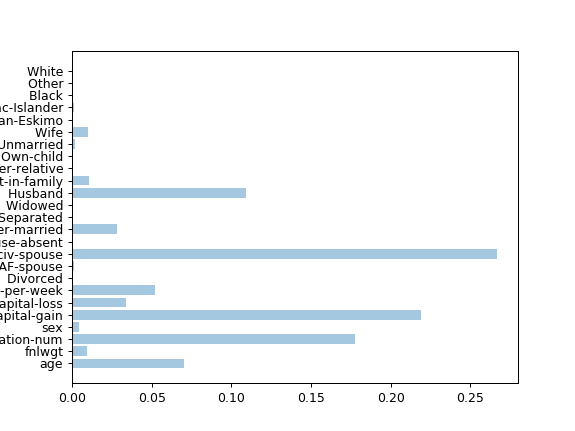

([<matplotlib.axis.YTick at 0x23e10800828>,
 <a list of 25 Text yticklabel objects>)

In [71]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
features = x_train_org.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)